# 目的

## 毎日の過去の売り上げデータから、テストセットのすべてのショップで販売された製品の合計量を予測する。

# ライブラリのimport

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データセットの読み込み

- sales_train.csv-トレーニングセット。2013年1月から2015年10月までの毎日の履歴データ。
- test.csv-テストセット。これらのショップと製品の2015年11月の売上を予測する必要があります。
- sample_submission.csv-正しい形式のサンプル送信ファイル。
- items.csv-アイテム/製品に関する補足情報。
- item_categories.csv-  アイテムのカテゴリに関する補足情報。
- shop.csv-ショップに関する補足情報。

In [5]:
df_sales = pd.read_csv("/Users/sugawaradaichi/4nonome/kaggle/PredictFutureSales/dataset/competitive-data-science-predict-future-sales/sales_train.csv")
df_itemc = pd.read_csv("/Users/sugawaradaichi/4nonome/kaggle/PredictFutureSales/dataset/competitive-data-science-predict-future-sales/item_categories.csv")
df_item = pd.read_csv("/Users/sugawaradaichi/4nonome/kaggle/PredictFutureSales/dataset/competitive-data-science-predict-future-sales/items.csv")
df_shop = pd.read_csv("/Users/sugawaradaichi/4nonome/kaggle/PredictFutureSales/dataset/competitive-data-science-predict-future-sales/shops.csv")
df_sample = pd.read_csv("/Users/sugawaradaichi/4nonome/kaggle/PredictFutureSales/dataset/competitive-data-science-predict-future-sales/sample_submission.csv")

# Data field

- ID-テストセット内の（ショップ、アイテム）タプルを表すID
- shop_id-ショップの一意の識別子
- item_id-商品の一意の識別子
- item_category_id-アイテムカテゴリの一意の識別子
- item_cnt_day-販売された製品の数。このメジャーの月額を予測しています
- item_price-アイテムの現在の価格
- 日付 -dd / mm / yyyy形式の日付
- date_block_num-便宜上使用される連続した月の番号。2013年1月は0、2013年2月は1、...、2015年10月は33
- item_name- アイテムの名前
- shop_name-ショップの名前
- item_category_name-アイテムカテゴリの名前


In [6]:
print(df_sales.head(10))
print()
print(df_itemc.head())
print()
print(df_item.head())
print()
print(df_shop.head())
print()
print(df_sample.head(30))

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
5  10.01.2013               0       25     2564      349.00           1.0
6  02.01.2013               0       25     2565      549.00           1.0
7  04.01.2013               0       25     2572      239.00           1.0
8  11.01.2013               0       25     2572      299.00           1.0
9  03.01.2013               0       25     2573      299.00           3.0

        item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3    

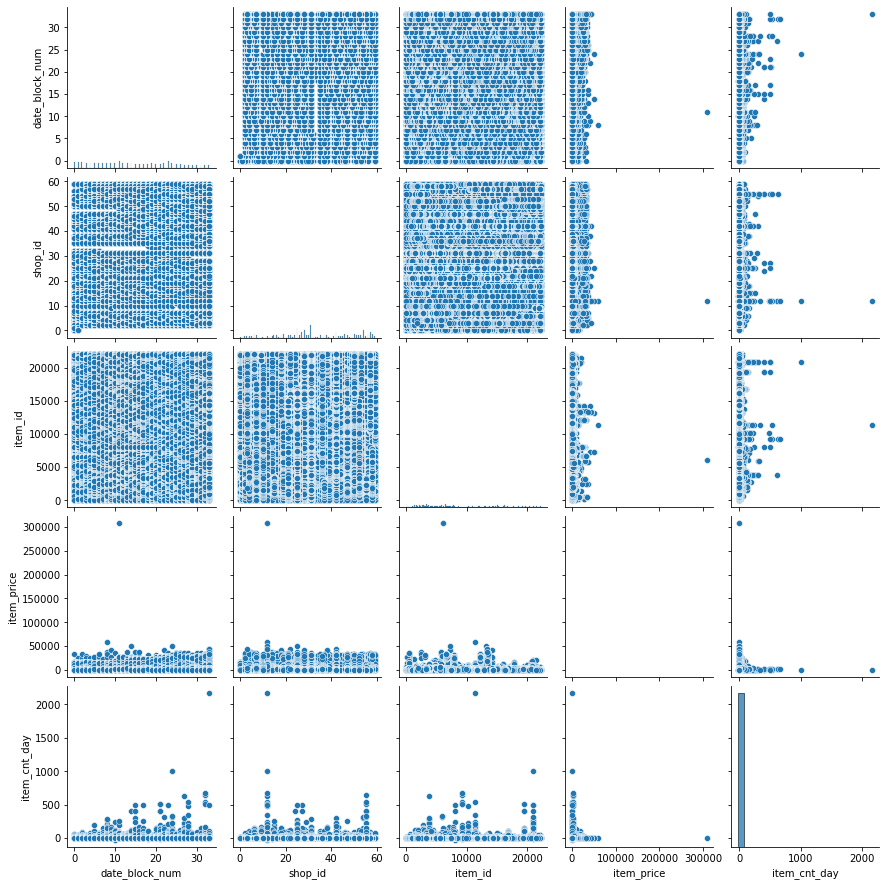

In [7]:
sns.pairplot(df_sales)

## dateをYYYY-mm-dd形式に変換

In [53]:
str_1 = df_sales['date']
date_c = pd.to_datetime(str_1, format='%d.%m.%Y')
df_sales.assign(date = date_c)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [55]:
df_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


([<matplotlib.axis.XTick at 0x7fdd4c658ee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

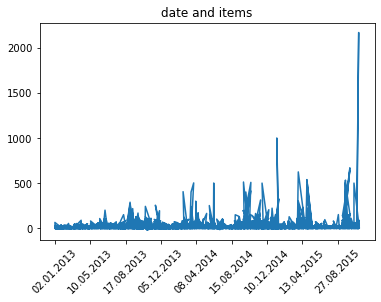

In [54]:
plt.title("date and items")
plt.plot(df_sales['date'], df_sales['item_cnt_day'])
plt.xticks([0, 120, 240, 360, 480, 600, 720, 840, 960], rotation=45)

<AxesSubplot:>

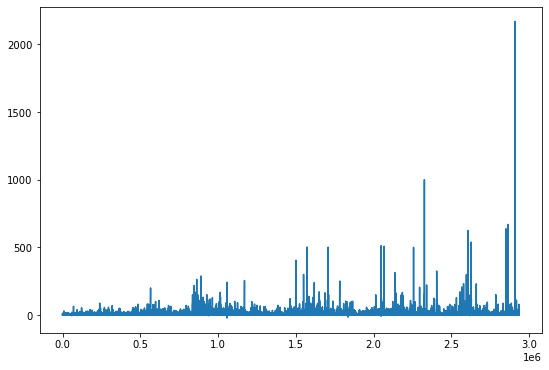

In [37]:
df_sales['item_cnt_day'].plot(figsize=(9, 6))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

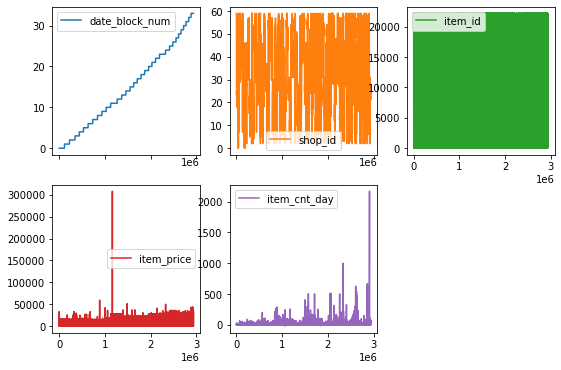

In [43]:
df_sales.plot(subplots=True, figsize=(9, 6), layout=(2, 3))